<a href="https://colab.research.google.com/github/wnyngj/DT-/blob/main/2_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# numpy(수학적 계산), pandas(엑셀 분석), matplotlib(시각화)
!pip install numpy pandas matplotlib

In [ ]:
import pandas as pd

In [ ]:
pd.__version__

'1.5.3'

In [ ]:
# 판다스의 데이터
# (1) Series-컬럼1개
# (2) DataFrame-컬럼이 2개 이상

data = ['A', 'B', 'C', 'D', 'E']

se = pd.Series(data)

se.index
se.values

se[2] # indexing
se[0:3] # slcicing

0    A
1    B
2    C
dtype: object

In [ ]:
# raw data: 날 것의 데이터
data = {
    'country' : ["kor", "usa", "china", "japan"],
    'rank' : [1,2,3,4],
    'grade' : ["A", "B", "C", "D"],
}

df = pd.DataFrame(data)
df

,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C
3,japan,4,D


In [ ]:
df.to_csv("test.csv")

In [ ]:
# (1) 데이터 셀랙션
# 데이터에서 내가 원하는 데이터를 가져오는 방법

# df.컬럼, df['컬럼명']

df.country
df[['country', 'rank']]

needs_col = ['rank', 'country']
df[needs_col]

,rank,country
0,1,kor
1,2,usa
2,3,china
3,4,japan


In [ ]:
# df.loc[인덱스명, 컬럼명]
df.loc[0:3, ['rank', 'country']] # 인덱스값이 0인 녀석의 행(row) 데이터

,rank,country
0,1,kor
1,2,usa
2,3,china
3,4,japan


In [ ]:
# 데이터를 추가 or 삭제하는 방법

# 컬럼 추가
df['president'] = ['yoon', 'biden', 'jinping', 'kishida']
df

,country,rank,grade,president
0,kor,1,A,yoon
1,usa,2,B,biden
2,china,3,C,jinping
3,japan,4,D,kishida


In [ ]:
# 행 데이터를 추가하는 방법
df.loc[4] = ['singapole', 5, 'A', 'Tharman']

In [ ]:
df

,country,rank,grade,president
0,kor,1,A,yoon
1,usa,2,B,biden
2,china,3,C,jinping
3,japan,4,D,kishida
4,singapole,5,A,Tharman


In [ ]:
# 데이터를 제거하는 방법 => drop()

# 고객님 저희는 데이터를 지우는 함수가 없습니다. 고객님이 동의를 하셔야지만 제거가 된다는 점.
df.drop(columns='grade', inplace=True)

In [ ]:
df = df.drop(2)
df

In [ ]:
# 집합함수 (Aggregation)
# EDA - 데이터를 훑는 과정

# df.sum()
# df.mean()
# df.max()
# df.min()

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    4 non-null      object
 1   rank       4 non-null      int64 
 2   president  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 128.0+ bytes


<ipython-input-49-2f292a2128ef>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


In [ ]:
df

,country,rank,president
0,kor,1,yoon
1,usa,2,biden
3,japan,4,kishida
4,singapole,5,Tharman


In [ ]:
# raw data: 날 것의 데이터
data = {
    'country' : ["kor", "usa", "china", "japan"],
    'rank' : [1,2,3,4],
    'grade' : ["A", "B", "C", "D"],
}

df = pd.DataFrame(data)
df

,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C
3,japan,4,D


In [ ]:
# null 데이터(NaN) 처리 방법
# NaN: Not a Number

# - isna() => 데이터가 null 인지 아닌지에 대한 여부 판단
# - fillna() => null 데이터를 채워주는 함수
# - dropna() => null 데이터를 제거해주세요.

df['check'] = [None, None, None, None]

,country,rank,grade,check
0,kor,1,A,None
1,usa,2,B,None
2,china,3,C,None
3,japan,4,D,None


In [ ]:
df.isna().sum()

In [ ]:
# fillna()
df.fillna('pass', inplace=True)

In [ ]:
df.loc[2]

In [ ]:
df.loc[2, 'check'] = None

In [ ]:
# null 데이터 제거 => dropna()
df.dropna(how='any')

,country,rank,grade,check
0,kor,1,A,pass
1,usa,2,B,pass
3,japan,4,D,pass


In [ ]:
# 연습문제
import pandas as pd
data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


In [ ]:
# 1) 전체 데이터 중에서 '영화' 정보만 출력하시오.
df.영화

df['영화']
df.loc[0:7, '영화']

In [ ]:
# 2) 전체 데이터 중에서 '영화','평점' 정보를 출력하시오.

df[['영화', '평점']]
df.loc[:, ['영화', '평점']]

,영화,평점
0,명량,8.88
1,극한직업,9.20
2,신과함께-죄와 벌,8.73
3,국제시장,9.16
4,괴물,8.62
5,도둑들,7.64
6,7번방의 선물,8.83
7,암살,9.10


In [ ]:
# 3) 2015년 이후에 개봉한 영화 데이터 중에서 '영화','개봉연도' 정보를 출력하시오.
# - (0) 개봉 연도
# - (1) 2015년 이후에 개봉한 영화 (조건 추가)
# - (2) 추출한 데이터에서 컬럼값이 '영화', '개봉연도' 인 데이터를 출력한다.

df[df['개봉 연도'] > 2015][['영화', '개봉 연도']]
df.loc[df['개봉 연도'] > 2015, ['영화', '개봉 연도']]

In [ ]:
# 4) 주어진 계산식을 참고하여 '추천 점수' Column을 추가하시오.
# - 추천 점수 = (관객수 * 평점) // 100

df['추천 점수'] = (df['관객 수'] * df['평점']) // 100
df

,영화,개봉 연도,관객 수,평점,추천 점수
0,명량,2014,1761,8.88,156.0
1,극한직업,2019,1626,9.20,149.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
3,국제시장,2014,1426,9.16,130.0
4,괴물,2006,1301,8.62,112.0
5,도둑들,2012,1298,7.64,99.0
6,7번방의 선물,2013,1281,8.83,113.0
7,암살,2015,1270,9.10,115.0


In [ ]:
# 5) 전체 데이터를 '개봉연도' 기준 내림차순으로 출력하시오.
df.sort_values(by=['추천 점수', '개봉 연도'], ascending=False)

,영화,개봉 연도,관객 수,평점,추천 점수
0,명량,2014,1761,8.88,156.0
1,극한직업,2019,1626,9.20,149.0
3,국제시장,2014,1426,9.16,130.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
7,암살,2015,1270,9.10,115.0
6,7번방의 선물,2013,1281,8.83,113.0
4,괴물,2006,1301,8.62,112.0
5,도둑들,2012,1298,7.64,99.0


In [ ]:
# dropna를 써서 2번 row를 지울 때 how, any에 대한 설명을 한 번더 해주실 수 있을까요?

In [ ]:
df.loc[5, '추천 점수'] = None

In [ ]:
df.dropna(how='any')

,영화,개봉 연도,관객 수,평점,추천 점수
0,명량,2014,1761,8.88,156.0
1,극한직업,2019,1626,9.20,149.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
3,국제시장,2014,1426,9.16,130.0
4,괴물,2006,1301,8.62,112.0
6,7번방의 선물,2013,1281,8.83,113.0
7,암살,2015,1270,9.10,115.0


## 와인 데이터 분석
- 현재 여러분이 와인 가게를 운영하고 있다고 가정하고 데이터 분석을 진행
- 피터 드러커 => 측정할 수 없으면 관리할 수 없고, 관리할 수 없으면 개선할 수 없다.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('winequality.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# EDA => 데이터를 훑어보는 작업
df.head() # 상위 5개의 데이터만 보여주는 겁니다.
df.tail() # 하위 5개의 데이터

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# alcohol 컬럼의 평균 값
df['alcohol'].std()

# 'residual sugar' 열에서 최대값(max)과 최소값(min)의 차이를 계산하세요.

df['residual sugar'].max() - df['residual sugar'].min()

65.2

In [ ]:
# 우리가게의 alcohol, qulality의 평균값은 어떻게 되는가?

df.describe()

df[['alcohol', 'quality']].describe()

,alcohol,quality
count,6497.000000,6497.000000
mean,10.491801,5.818378
std,1.192712,0.873255
min,8.000000,3.000000
25%,9.500000,5.000000
50%,10.300000,6.000000
75%,11.300000,6.000000
max,14.900000,9.000000


In [ ]:
# 우리 가게의 와인의 등급별 구성은 어떻게 되어있지?
# 값들의 갯수가 어떻게 되니? => value_counts()

df['quality'].value_counts().sort_index().to_frame() # Series

In [ ]:
#'fixed acidity' 열과 'pH' 열의 값이 각각 3 이상, 4이상 인 데이터만 추출하여 데이터 프레임을 생성하시오.
df[(df['fixed acidity'] >= 3) & (df['pH'] >= 4)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6214,red,5.4,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
6219,red,5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6


In [ ]:
# 'volatile acidity' 열의 값이 0.5 이하인 데이터의 'quality' 열의 평균을 계산하세요.
df_low_acidity = df[df['volatile acidity'] <= 0.5]
df_low_acidity # 문과는 뭘 잘하죠? => GPT가 가져온 기회 (코딩은 이제 누구나 할 수 있는 시대가 열렸습니다.)

5.897160538769567

In [ ]:
df_low_acidity['quality'].mean()

5.897160538769567

## NBA 데이터
- 현재 NBA에서 활동하고 있는 전체 선수 데이터 입니다.

(1) 당신은 팀에서 선수 영입을 담당하고 있는 에이전트 입니다.
- 우리팀은 누구를 영입해야 할까요? 어떤 팀에서 데려와야 할까요?

(2) 자녀를 키우고 있는 학부모입니다. 자녀가 농구선수가 되고 싶어해요.

어떤 포지션을 선택하는 것이 아이를 위한 선택이 될까요?
어떤 학교에 가는 것이 선수가 되는 것이 유리할까요?


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('nba.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [ ]:
# 현재 저를 선수영입담당이라고 가정을 하고 진행.

# 현재 각 팀별 선수는 몇 명씩 있나요? -> value_counts()
df['Team'].value_counts()

New Orleans Pelicans      19
Memphis Grizzlies         18
New York Knicks           16
Milwaukee Bucks           16
Boston Celtics            15
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Dallas Mavericks          15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Utah Jazz                 15
Orlando Magic             14
Minnesota Timberwolves    14
Name: Team, dtype: int64

In [ ]:
df.groupby('Team').groups
df.groupby('Team').size().sort_values(ascending=False)

# (1) 팀별 평균 연봉은 어떻게 되나요?
# (2) 평균 연봉이 가장 높은 상위 5개 팀은?
df.groupby('Team')['Salary'].mean().sort_values(ascending=False).head().to_frame()

,Salary
Team,
Cleveland Cavaliers,7.642049e+06
Miami Heat,6.347359e+06
Los Angeles Clippers,6.323643e+06
Oklahoma City Thunder,6.251020e+06
Golden State Warriors,5.924600e+06


In [ ]:
# 포지션별 평균 연봉은 어떻게 되나요?
# 포지션별 평균 몸무게는 어떻게 되나요?
df.groupby('Position')[['Salary', 'Weight']].mean()

,Salary,Weight
Position,,
C,5.967052e+06,254.205128
PF,4.562483e+06,240.430000
PG,5.077829e+06,189.478261
SF,4.857393e+06,221.776471
SG,4.009861e+06,206.686275


In [ ]:
# 포지션별 평균 키는 어떻게 되나요?
# feet, inch => cm
# 6-5: 6feet 5inch => 6*30.48 + 5 * 2.54 => cm

# feet, inch 각각 컬럼을 생성

def make_cm(x):
    print('height', x)

    feet = int(x.split('-')[0])
    inch = int(x.split('-')[1])
    cm = feet * 30.48 + inch * 2.54

    return cm

df['Height(cm)'] = df['Height'].apply(make_cm)

# df.dropna(how='any', inplace=True)
# df['Height'].isna().sum()

In [ ]:
# height = '6-10'

# feet = int(height.split('-')[0])
# inch = int(height.split('-')[1])

# cm = feet * 30.48 + inch * 2.54
# cm

df.groupby('Position')['Height(cm)'].mean()

Position
C     210.975510
PF    207.151111
PG    188.728684
SF    201.876338
SG    196.835402
Name: Height(cm), dtype: float64

In [ ]:
# 학교별로 출신 선수가 몇 명 인지를 보고자 하면 어떻게 하면 될까요?
# 가장 많은 선수를 배출한 상위 10개 학교는 어디인가요?

df.groupby('College').size().sort_values(ascending=False).head(10)
df.groupby('College')['Salary'].mean().sort_values(ascending=False).head(5)

College
Oklahoma           1.890773e+07
Louisiana Tech     1.867166e+07
San Diego State    1.640750e+07
Marquette          1.198129e+07
Texas A&M          1.177876e+07
Name: Salary, dtype: float64

## 시각화 (Matplotlib)

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot([1,2,3,4,5,4,3,2,1])

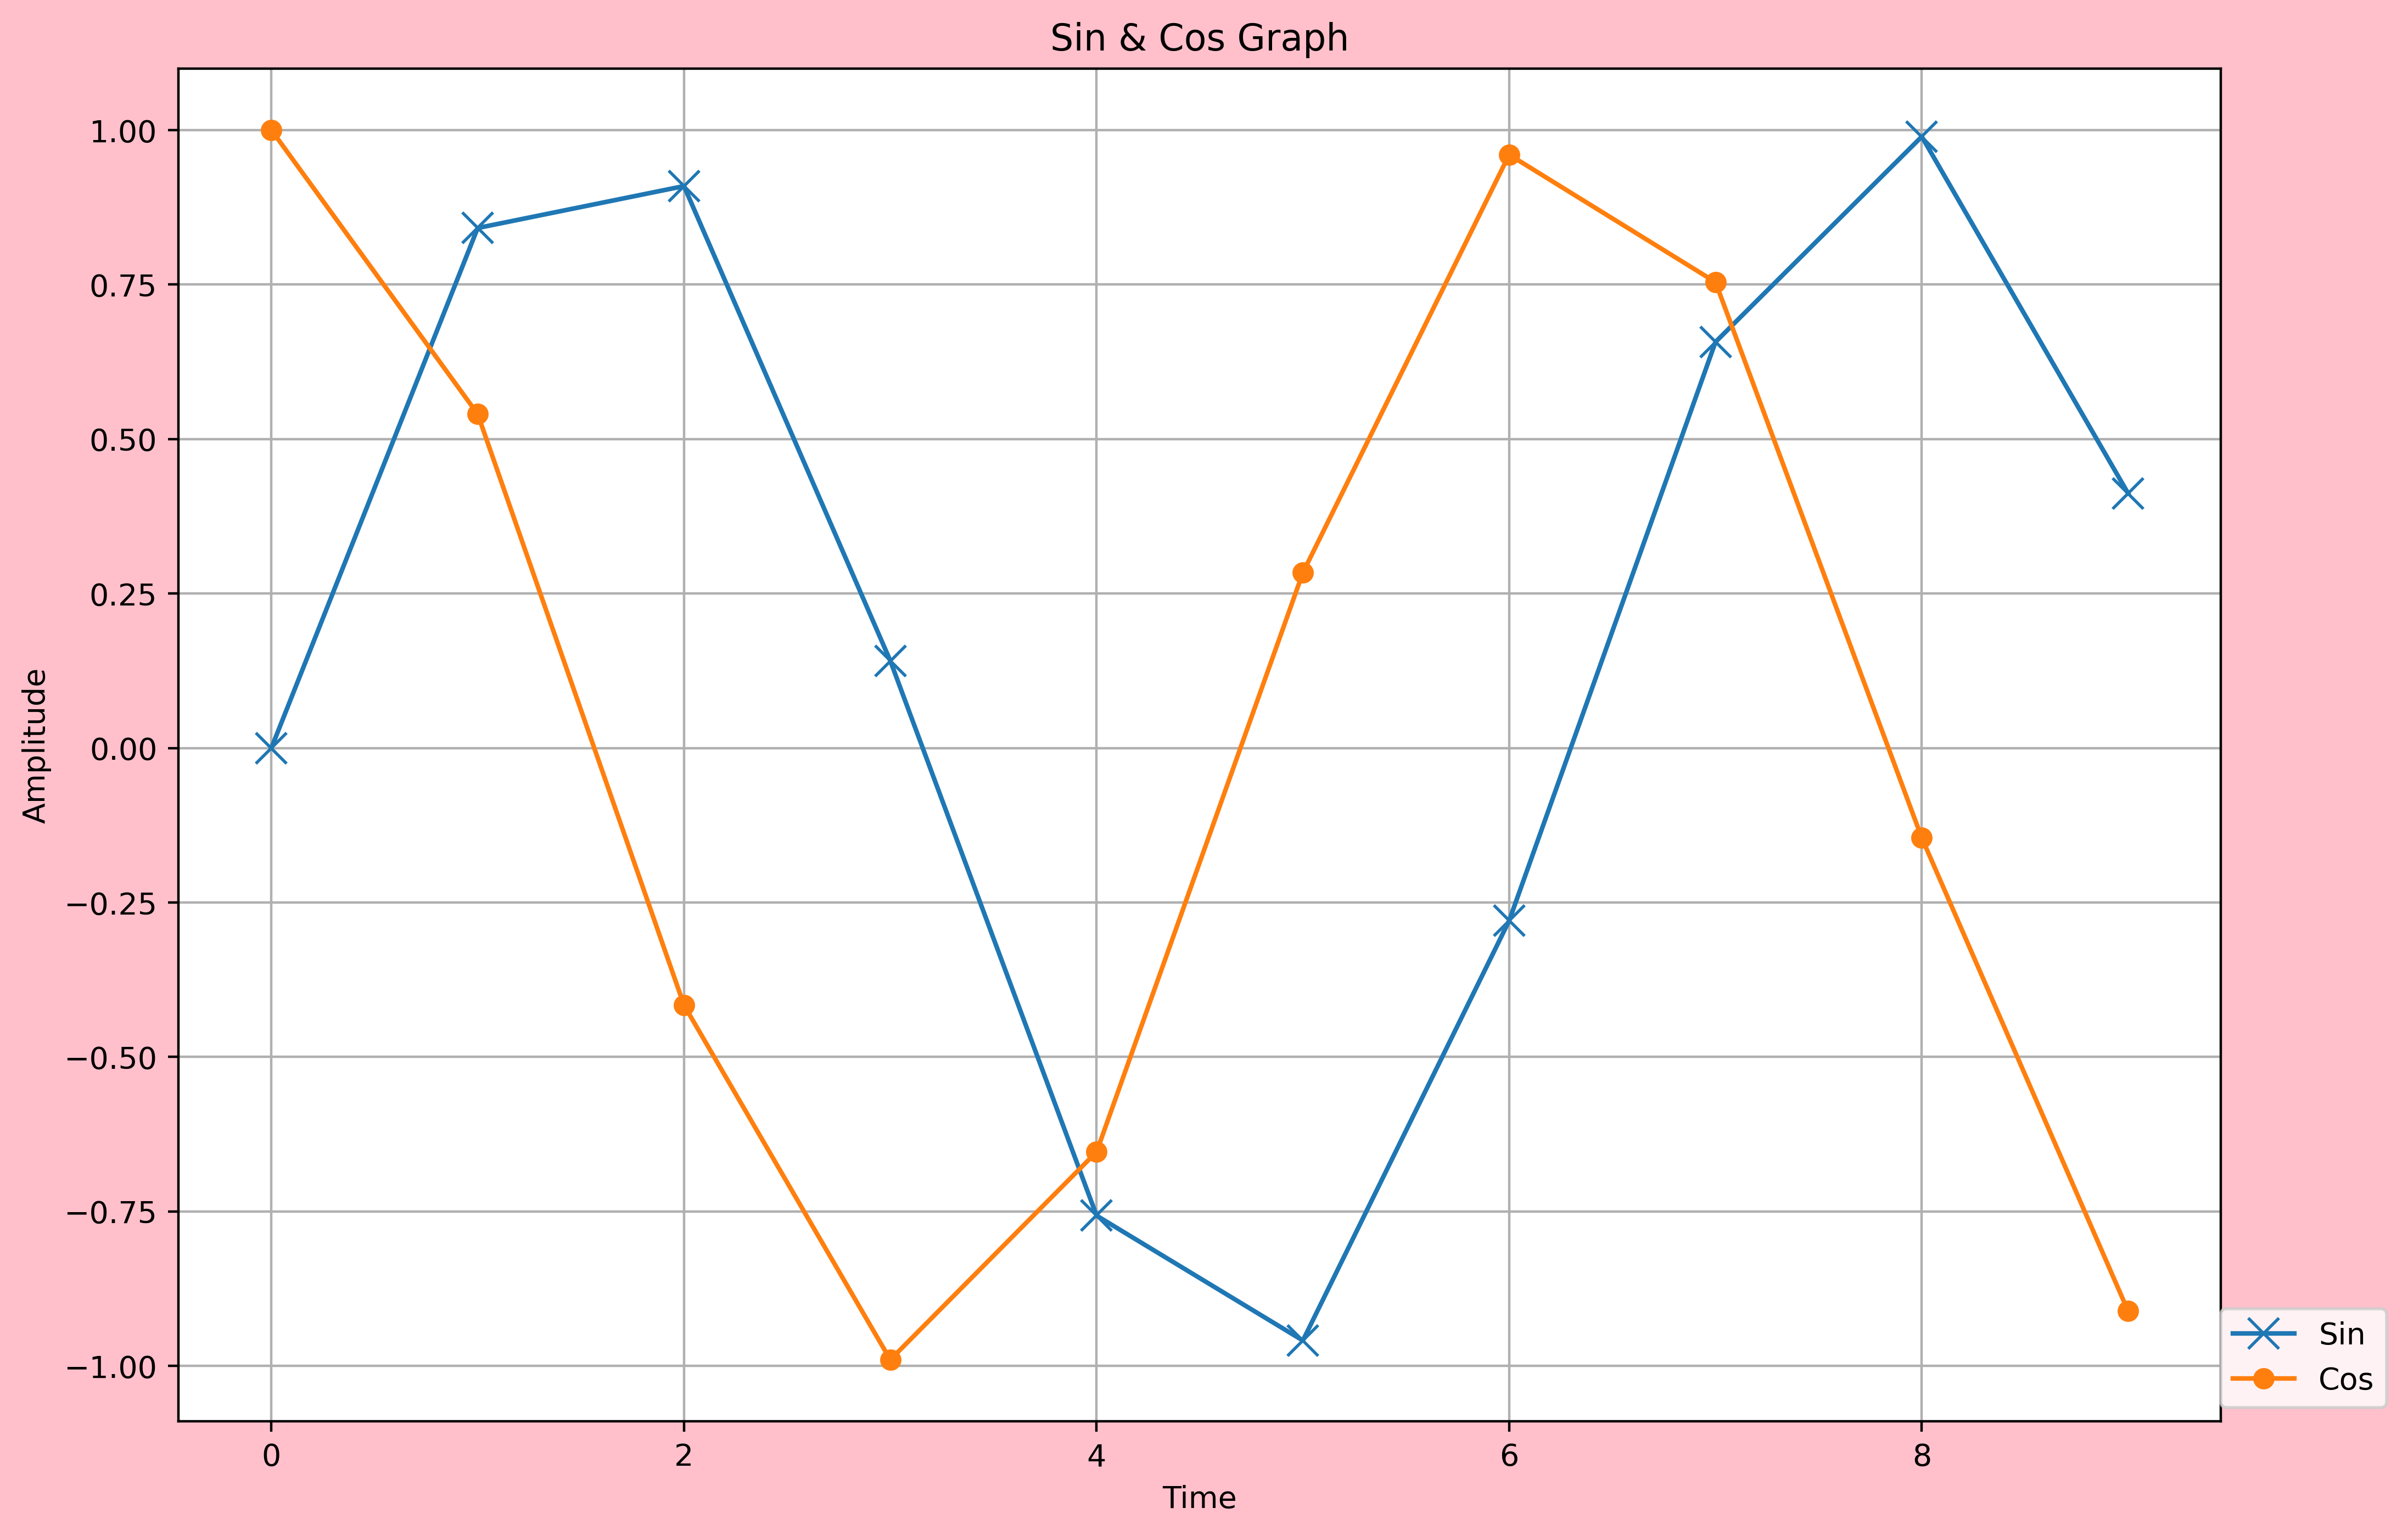

In [ ]:
import numpy as np # 수학적연산을 할 때 활용

x = np.arange(0, 10, 1)
y = np.sin(x)
y2 = np.cos(x)

# 도화지 (그래프 외 다른 부분들을 꾸미는 기능)
plt.figure(facecolor='pink', figsize=(12,8), dpi=400) # dots per inch: 화질

plt.plot(x, y, label='Sin', marker='x', markersize=10)
plt.plot(x, y2, label='Cos', marker='o')

plt.title("Sin & Cos Graph")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# plt.xlim(0, 4)

plt.legend(loc=(1,0.01)) # 범례 추가

plt.grid()

In [ ]:
import matplotlib.pyplot as plt

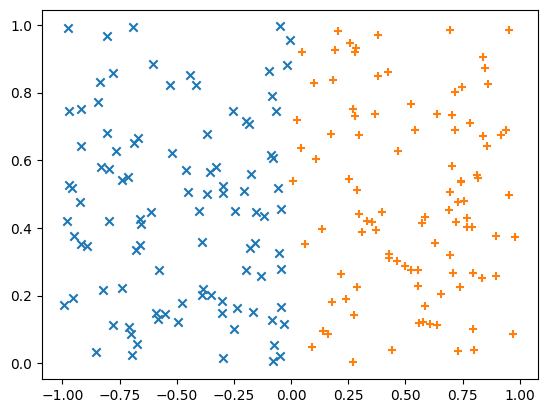

In [ ]:
# Scatter 그래프를 그려보겠습니다.
import numpy as np

x1 = np.random.rand(100) - 1.0
x2 = np.random.rand(100)

y1 = np.random.rand(100)
y2 = np.random.rand(100)

plt.scatter(x1, y1, marker='x') # alt + shift + 화살표 밑으로 // option + shift + 화살표 밑으로
plt.scatter(x2, y2, marker='+')

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/KNN_data.csv')
df

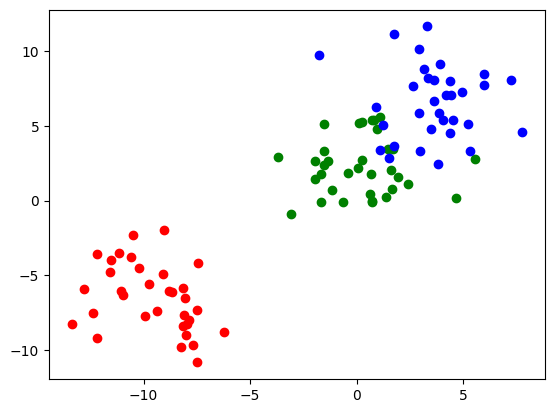

In [ ]:
# Label => Small, Medium, Large로 구분

df_small = df[df['Label'] == 'Small']
df_medium = df[df['Label'] == 'Medium']
df_large = df[df['Label'] == 'Large']

plt.scatter(df_small['x'], df_small['y'], color='red', label='Small')
plt.scatter(df_medium['x'], df_medium['y'], color='green', label='Medium')
plt.scatter(df_large['x'], df_large['y'], color='blue', label='Large')

<BarContainer object of 3 artists>

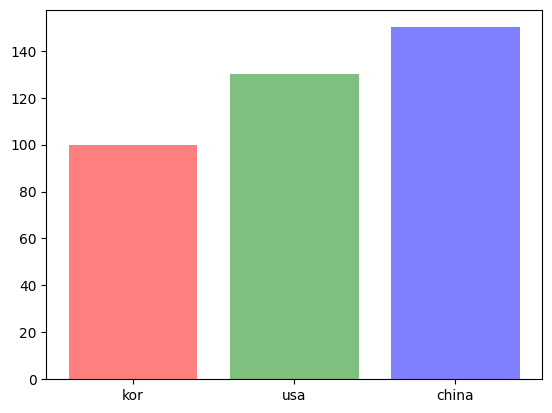

In [ ]:
# bar chart
labels = ['kor', 'usa', 'china'] # x축 라벨값
values = [100, 130, 150]
color = ['r', 'g', 'b']

plt.bar(labels, values, color=color, alpha=0.5)

# Q. 여러분은 중국 법인을 담당하고 있는 중국 법인장입니다.
# 이번에 대표님 앞에서 PT를 합니다.
# 중국 시장이 정말 크고 잘하고 있다는 것을 어떻게 좀 더 어필할 수 있을까요?

<BarContainer object of 3 artists>

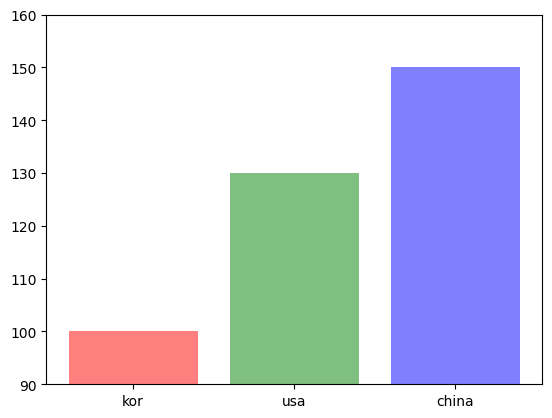

In [ ]:
labels = ['kor', 'usa', 'china'] # x축 라벨값
values = [100, 130, 150]
color = ['r', 'g', 'b']

plt.ylim(90, 160)
plt.bar(labels, values, color=color, alpha=0.5)

In [ ]:
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


In [ ]:
## 1. 영화 데이터를 활용하여 x 축은 영화, y축은 평점인 막대(bar) 그래프를 만드시오.
## (1) 막대그래프
## (2) x=영화, height=평점

plt.figure(figsize=(12,8))
plt.bar(df['영화'], df['평점'])

In [ ]:
## 2. 앞에서 만든 막대 그래프에 제시된 세부 사항을 적용하시오.
## - 제목: 국내 Top 8 영화 평점 정보
## - x축 label: 영화 (90도 회전)
## - y축 label: 평점

plt.figure(figsize=(12,8))
plt.bar(df['영화'], df['평점'])

plt.title("국내 Top8 영화 평점")

plt.xlabel("영화")
plt.xticks(rotation=90)

plt.ylabel("평점")

<ipython-input-20-84aa911a9830>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('개봉 연도').mean()


(7.0, 10.0)

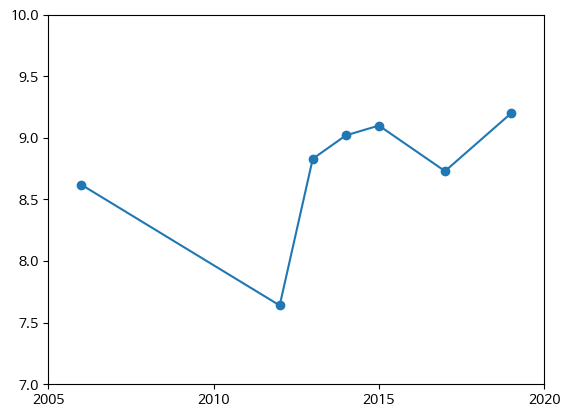

In [ ]:
## 3. 개봉 연도별 평점 변화 추이를 꺾은선 그래프(plot)로 그리시오.
## (1) 개봉 연도별 평점
## (2) x축에는 연도 데이터가 들어가야 하고, y축에는 평점 데이터가 들어가면 되겠네요.

df_mean = df.groupby('개봉 연도').mean()

x = df_mean.index
y = df_mean['평점']

plt.plot(x, y, marker='o')
plt.xticks([2005, 2010, 2015, 2020])
plt.ylim(7, 10)

In [ ]:
## 4) 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오.
## - marker: 'o'
## - x축 눈금: 5년 단위 (2005, 2010, 2015, 2020)
## - y축 범위: 최소 7, 최대 10

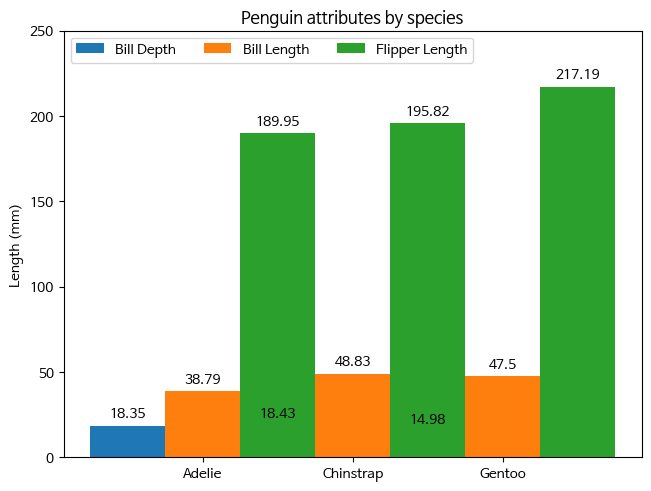

In [ ]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}










x = np.arange(len(species))  # the label locations
width = 0.5  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

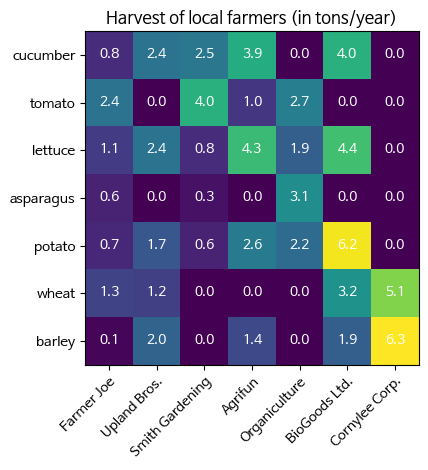

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl


vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

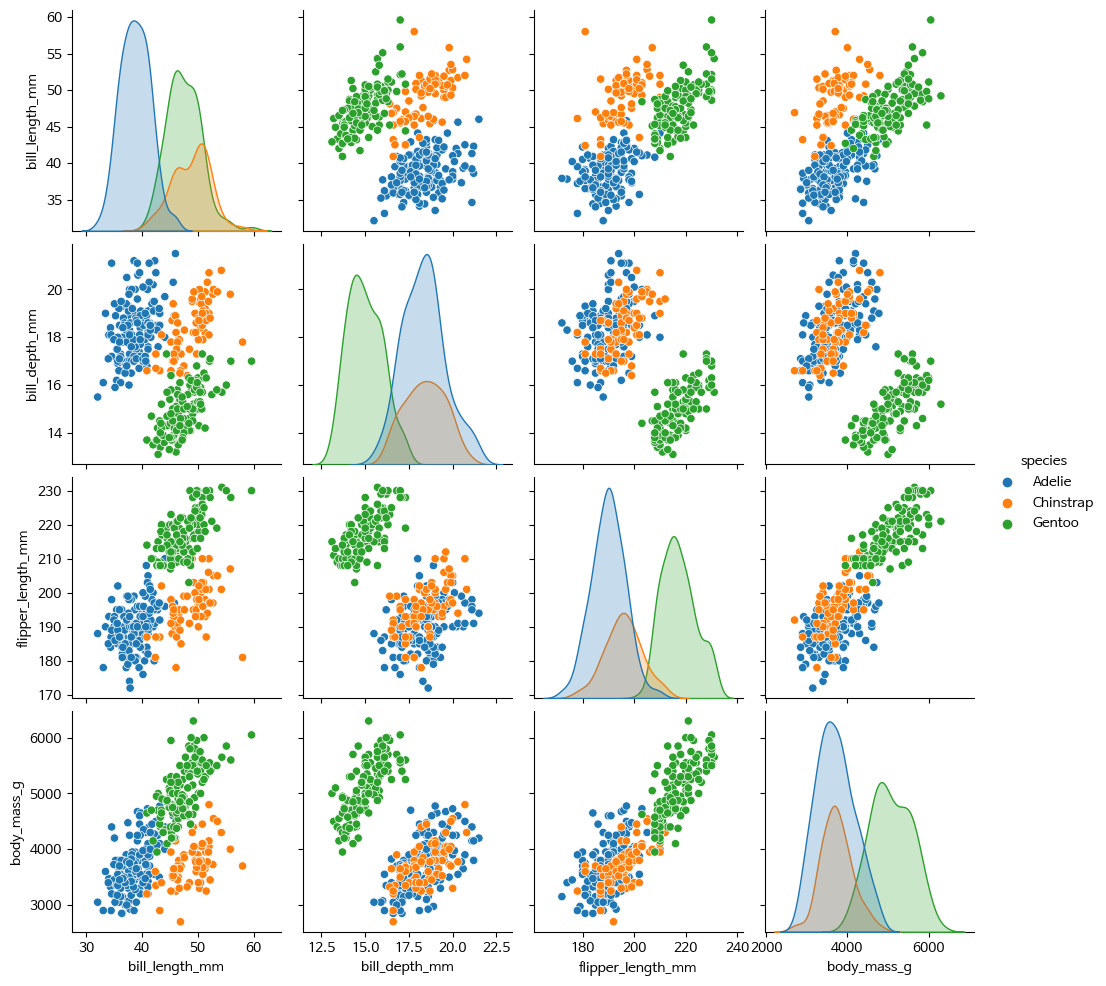

In [ ]:
# seaborn
import seaborn as sns
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [ ]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('tips')
df

# 알바 자리를 제안받았는데,
# 언제 일을 한다면 가장 많은 팁을 받을 수 있을까요?
# 사장님이 여러분에 가게의 데이터를 줬습니다. 그리고 언제 일할래? 라고 물어본거에요.
# 그리고 누구에게 서빙을 했을 때 가장 많은 팁을 받을 수 있을까요?

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: xlabel='day', ylabel='tip'>

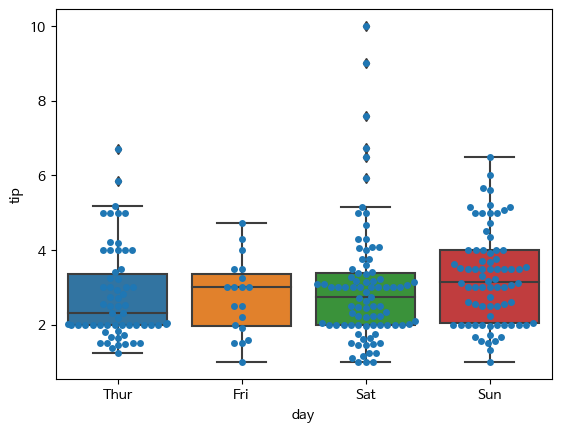

In [ ]:
# 언제 일할래? -> (1) 요일 (2) 시간 // 토요일, 저녁
# 누구한테 서빙할래? -> (1) 성별 (2) 흡연여부 // 남성, 상관없음

# sns.boxplot(data=df, x='sex', y='tip', hue='smoker') # 토, 일


sns.boxplot(data=df, x='day', y='tip') # 토, 일
sns.swarmplot(data=df, x='day', y='tip')

# boxplot의 단점 -> 데이터의 분포를 자세하게 알 수가 없다.

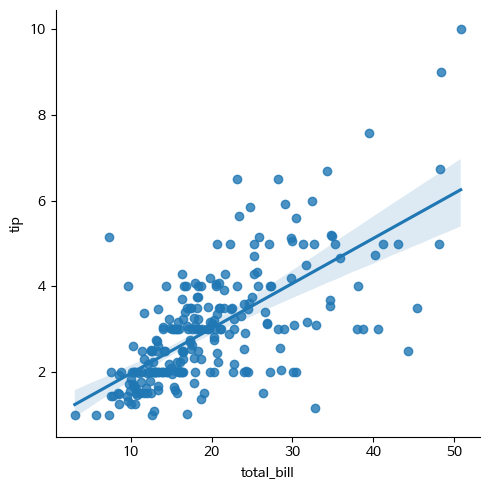

In [ ]:
# 선형관계 -> 회귀분석(Regression Analysis)

# 데이터들이 상관관계인가?

# 양의 상관관계
# 키가 클수록 -> 몸무게도 커질 가능성이 높다.
# 전체 계산 금액이 클수록 -> 팁도 커질 가능성이 높다.

# 음의 상관관계
# 자동차의 평균 속력이 높을수록 -> 연비는 낮아질 가능성이 높다.

# 전체계산 금액이 높을수록 (사람이 많이 온다던가 (size), 많이 먹는다던지) -> 팁도 높아지는가?

# x,y의 선형관계를 보여주는 그래프
sns.lmplot(data=df, x='total_bill', y='tip')

In [ ]:
df.corr() # 1에 가까울수록 양의 상관관계

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
# 히트맵 => 시계열 데이터 시각화
df = sns.load_dataset('flights')
df

# 한 눈에 들어오지 않는 데이터를 => 한 눈에 보고싶어.
# 공통되는 데이터 영역을 찾으면 된다. => year, month, passengers

# index=None, columns=None, values=None
df_pivot = df.pivot(index='month', columns='year', values='passengers')

<Axes: xlabel='year', ylabel='month'>

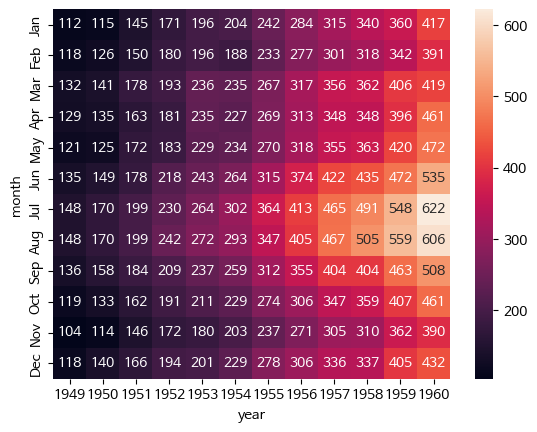

In [ ]:
sns.heatmap(df_pivot, annot=True, fmt='d')

In [ ]:
# 분석에 대한 갈증
# 링크를 공유드릴게요. => 강의 교안. 다른 데이터 셋들이 들어있습니다.

## 데이터 크롤링
- crawling: crawl(긁어오다)
- 정보가 돈이 되나요? => 돈이 된다면 어떤 정보를 수집했을 때 돈으로 바꿀 수 있을까?

+ GPT를 활용한 크롤링 방법

In [ ]:
# 크롤링 라이브러리 다운로드
!pip install selenium
!pip install webdriver-manager

In [ ]:
# 라이브러리 import
from selenium import webdriver
from selenium.webdriver.common.by import By

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')

In [ ]:
browser = webdriver.Chrome(options=options)

In [ ]:
url = 'https://new.land.naver.com/complexes/111515?ms=37.497624,127.107268,17&a=APT:ABYG:JGC:PRE&b=A1&e=RETAIL&h=99&i=132'

browser.get(url)
browser.title

'네이버페이 부동산'

In [ ]:
browser.find_element(By.CLASS_NAME, 'complex_price--trade').find_element(By.CLASS_NAME, 'data').text

'19억 9,000'

In [ ]:
# 거래 데이터
browser.find_element(By.CLASS_NAME, 'item_inner').text

In [ ]:
url = 'https://weather.naver.com/'
browser.get(url)
browser.title

'네이버 날씨'

In [ ]:
data = browser.find_element(By.CLASS_NAME, 'current').text
data.split('\n')[1]

'8.3°'